<a href="https://colab.research.google.com/github/fjadidi2001/DataScienceJourney/blob/master/drugs_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Load packages
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jithinanievarghese/drugs-side-effects-and-medical-condition")

print("Path to dataset files:", path)

100%|██████████| 1.17M/1.17M [00:00<00:00, 48.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/jithinanievarghese/drugs-side-effects-and-medical-condition/versions/1


In [3]:
df = pd.read_csv("/root/.cache/kagglehub/datasets/jithinanievarghese/drugs-side-effects-and-medical-condition/versions/1/drugs_side_effects_drugs_com.csv")
df.sample(5)


,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
627,olanzapine,Bipolar Disorder,hives ; difficult breathing; swelling of your ...,olanzapine (oral),Atypical antipsychotics,"ZyPREXA, ZyPREXA Zydis",11%,Rx,C,N,X,NaN,Bipolar Disorder Other names: Bipolar Affectiv...,6.2,289.0,https://www.drugs.com/mtm/olanzapine.html,https://www.drugs.com/condition/bipolar-disord...
2675,calcipotriene,Psoriasis,hives ; difficult breathing; swelling of your ...,calcipotriene topical,Topical antipsoriatics,"Calcitrene, Dovonex, Sorilux",13%,Rx,C,N,NaN,Cosentyx: https://www.drugs.com/cosentyx.html ...,Psoriasis Other names: Erythrodermic Psoriasis...,6.5,34.0,https://www.drugs.com/mtm/calcipotriene-topica...,https://www.drugs.com/condition/psoriasis.html
1008,NoHist LQ,Colds & Flu,hives ; difficulty breathing; swelling of your...,chlorpheniramine and phenylephrine,Upper respiratory combinations,"Allan Tannate Pediatric, Allerest PE, BP Aller...",0%,Rx/OTC,N,N,X,prednisone: https://www.drugs.com/prednisone.h...,Cold Symptoms Other names: Cold; Common Cold; ...,NaN,NaN,https://www.drugs.com/mtm/nohist-lq.html,https://www.drugs.com/condition/cold-symptoms....
2758,upadacitinib,Rheumatoid Arthritis,"Upadacitinib may cause serious side effects, i...",upadacitinib Brand name: Rinvoq,Antirheumatics,Rinvoq,30%,Rx,NaN,N,NaN,Rinvoq: https://www.drugs.com/rinvoq.html | Co...,Rheumatoid Arthritis Other names: Arthritis; A...,5.9,69.0,https://www.drugs.com/upadacitinib.html,https://www.drugs.com/condition/rheumatoid-art...
258,clonidine,ADHD,hives ; difficult breathing; swelling of your ...,clonidine (oral),"Antiadrenergic agents, centrally acting","Catapres, Kapvay",14%,Rx,C,N,X,Buprenex: https://www.drugs.com/buprenex.html ...,ADHD (Attention Deficit Hyperactivity Disorder...,7.6,61.0,https://www.drugs.com/clonidine.html,https://www.drugs.com/condition/attention-defi...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   drug_name                      2931 non-null   object 
 1   medical_condition              2931 non-null   object 
 2   side_effects                   2807 non-null   object 
 3   generic_name                   2888 non-null   object 
 4   drug_classes                   2849 non-null   object 
 5   brand_names                    1718 non-null   object 
 6   activity                       2931 non-null   object 
 7   rx_otc                         2930 non-null   object 
 8   pregnancy_category             2702 non-null   object 
 9   csa                            2931 non-null   object 
 10  alcohol                        1377 non-null   object 
 11  related_drugs                  1462 non-null   object 
 12  medical_condition_description  2931 non-null   o

,0
drug_name,0
medical_condition,0
side_effects,124
generic_name,43
drug_classes,82
brand_names,1213
activity,0
rx_otc,1
pregnancy_category,229
csa,0


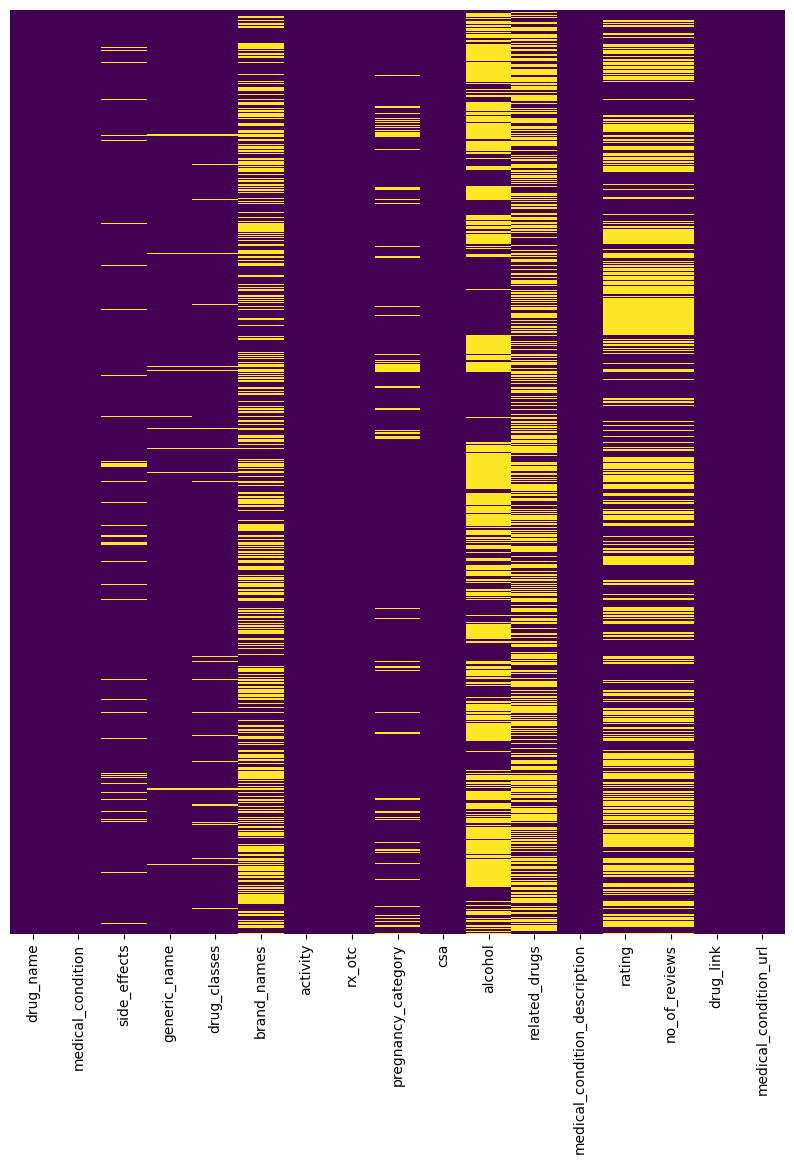

In [4]:
df.info()
# calculate duplicates
dups = df.duplicated()
# report if there are any duplicates
print(df.any())
# list all duplicate rows

print("Duplicate Rows",df[dups])
#Cardinality
df.nunique() # To determine the maximum and minimum number of variations in each column of the dataset
#Lets now check for null fields
import seaborn as sns
plt.figure(figsize=(10,12))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
df.isnull().sum()


In [5]:
# Data Cleaning¶
# Drop unwanted columns(not relevant for our model)
df = df.drop(['no_of_reviews', 'drug_link','medical_condition_url',"related_drugs"], axis = 1)
df.shape


(2931, 13)

In [6]:
df.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='coolwarm')


,count,mean,std,min,25%,50%,75%,max
rating,1586.000000,6.812926,2.313044,0.000000,5.600000,7.000000,8.500000,10.000000


In [7]:
# 1) Duplicates
dupli = df.duplicated()
df[dupli].shape
# Changing NaN to unknown
df['side_effects'] = df['side_effects'].fillna(value='Unknown') #  Changing the NaN values to unknown
#df['side_effects'].isnull().sum()
df['generic_name'] = df['generic_name'].fillna(value='Unknown') #  Changing the NaN values to unknown
#df['generic_name'].isnull().sum()
df['drug_classes'] = df['drug_classes'].fillna(value='Unknown') #  Changing the NaN values to unknown
#df['drug_classes'].isnull().sum()
df['brand_names'] = df['brand_names'].fillna(value='Unknown') #  Changing the NaN values to unknown
#df['brand_names'].isnull().sum()
df['pregnancy_category'] = df['pregnancy_category'].fillna(value='Unknown') #  Changing the NaN values to unknown
#df['pregnancy_category'].isnull().sum()
df['alcohol'] = df['alcohol'].fillna(value='Unknown') #  Changing the NaN values to unknown
#df['alcohol'].isnull().sum()
df['medical_condition_description'] = df['medical_condition_description'].fillna(value='Unknown') #  Changing the NaN values to unknown
#df['medical_condition_description'].isnull().sum()

df

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,medical_condition_description,rating
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,Unknown,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",Unknown,41%,Rx,X,N,X,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,Unknown,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,benzphetamine,Weight Loss,hives ; difficulty breathing; swelling of your...,benzphetamine,"Anorexiants, CNS stimulants","Didrex, Regimex",2%,Rx,X,3,X,Weight Loss (Obesity/Overweight) More than hal...,7.5
2927,fenfluramine,Weight Loss,hives ; difficult breathing; swelling of your ...,fenfluramine,"Anorexiants, CNS stimulants, Miscellaneous ant...",Fintepla,1%,Rx,C,4,X,Weight Loss (Obesity/Overweight) More than hal...,NaN
2928,Fendique ER,Weight Loss,Unknown,phendimetrazine tartrate,"Anorexiants, CNS stimulants",Unknown,0%,Rx,C,3,X,Weight Loss (Obesity/Overweight) More than hal...,NaN
2929,Imcivree,Weight Loss,"Imcivree may cause serious side effects, inclu...",setmelanotide,Melanocortin receptor agonists,Unknown,0%,Rx,Unknown,N,Unknown,Weight Loss (Obesity/Overweight) More than hal...,NaN


,count
pregnancy_category,
C,1382
B,509
N,436
Unknown,229
D,228
X,129
A,18


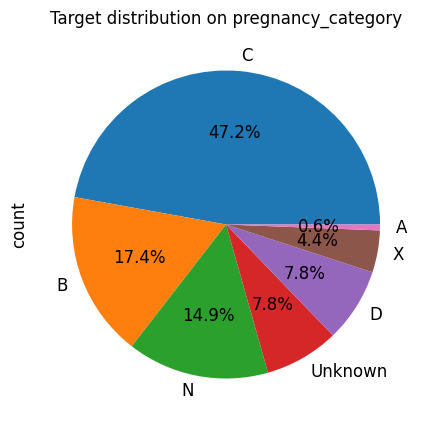

In [8]:
# Figure size
sns.set_context('poster', font_scale=0.5)
plt.figure(figsize=(5,5))
# Pie plot
df['pregnancy_category'].value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize':12}).set_title("Target distribution on pregnancy_category")
df['pregnancy_category'].value_counts()


,count
csa,
N,2688
2,101
4,71
3,26
5,20
M,16
U,9


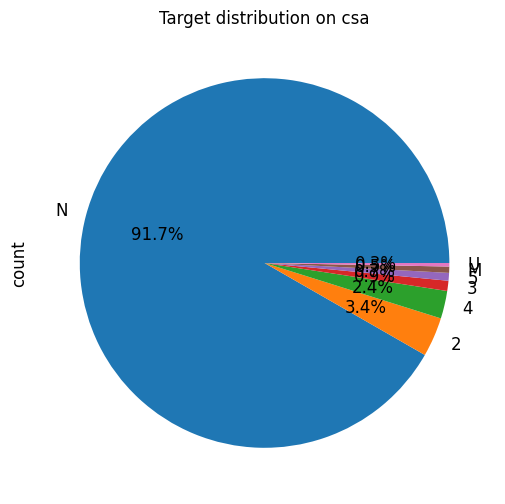

In [9]:
# Figure size
sns.set_context('poster', font_scale=0.5)
plt.figure(figsize=(6,6))
# Pie plot
df['csa'].value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize':12}).set_title("Target distribution on csa")
df['csa'].value_counts()

/tmp/ipython-input-10-2237773198.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x = 'csa',palette='plasma')


<Axes: xlabel='csa', ylabel='count'>

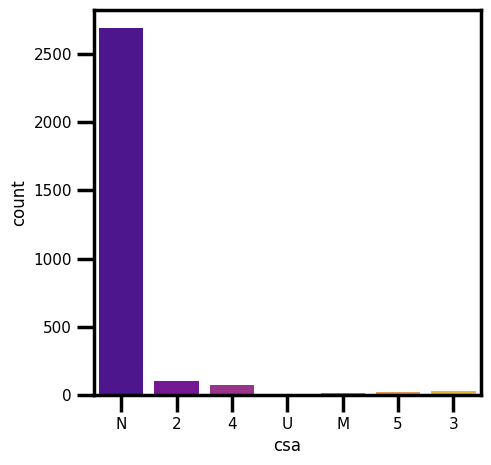

In [10]:
# Examining the variable's goal csa
plt.figure(figsize=(5,5))
sns.countplot(data=df,x = 'csa',palette='plasma')


,count
medical_condition,
Pain,264
Colds & Flu,245
Acne,238
Hypertension,177
Osteoarthritis,129
Hayfever,124
Eczema,122
AIDS/HIV,109
Diabetes (Type 2),104


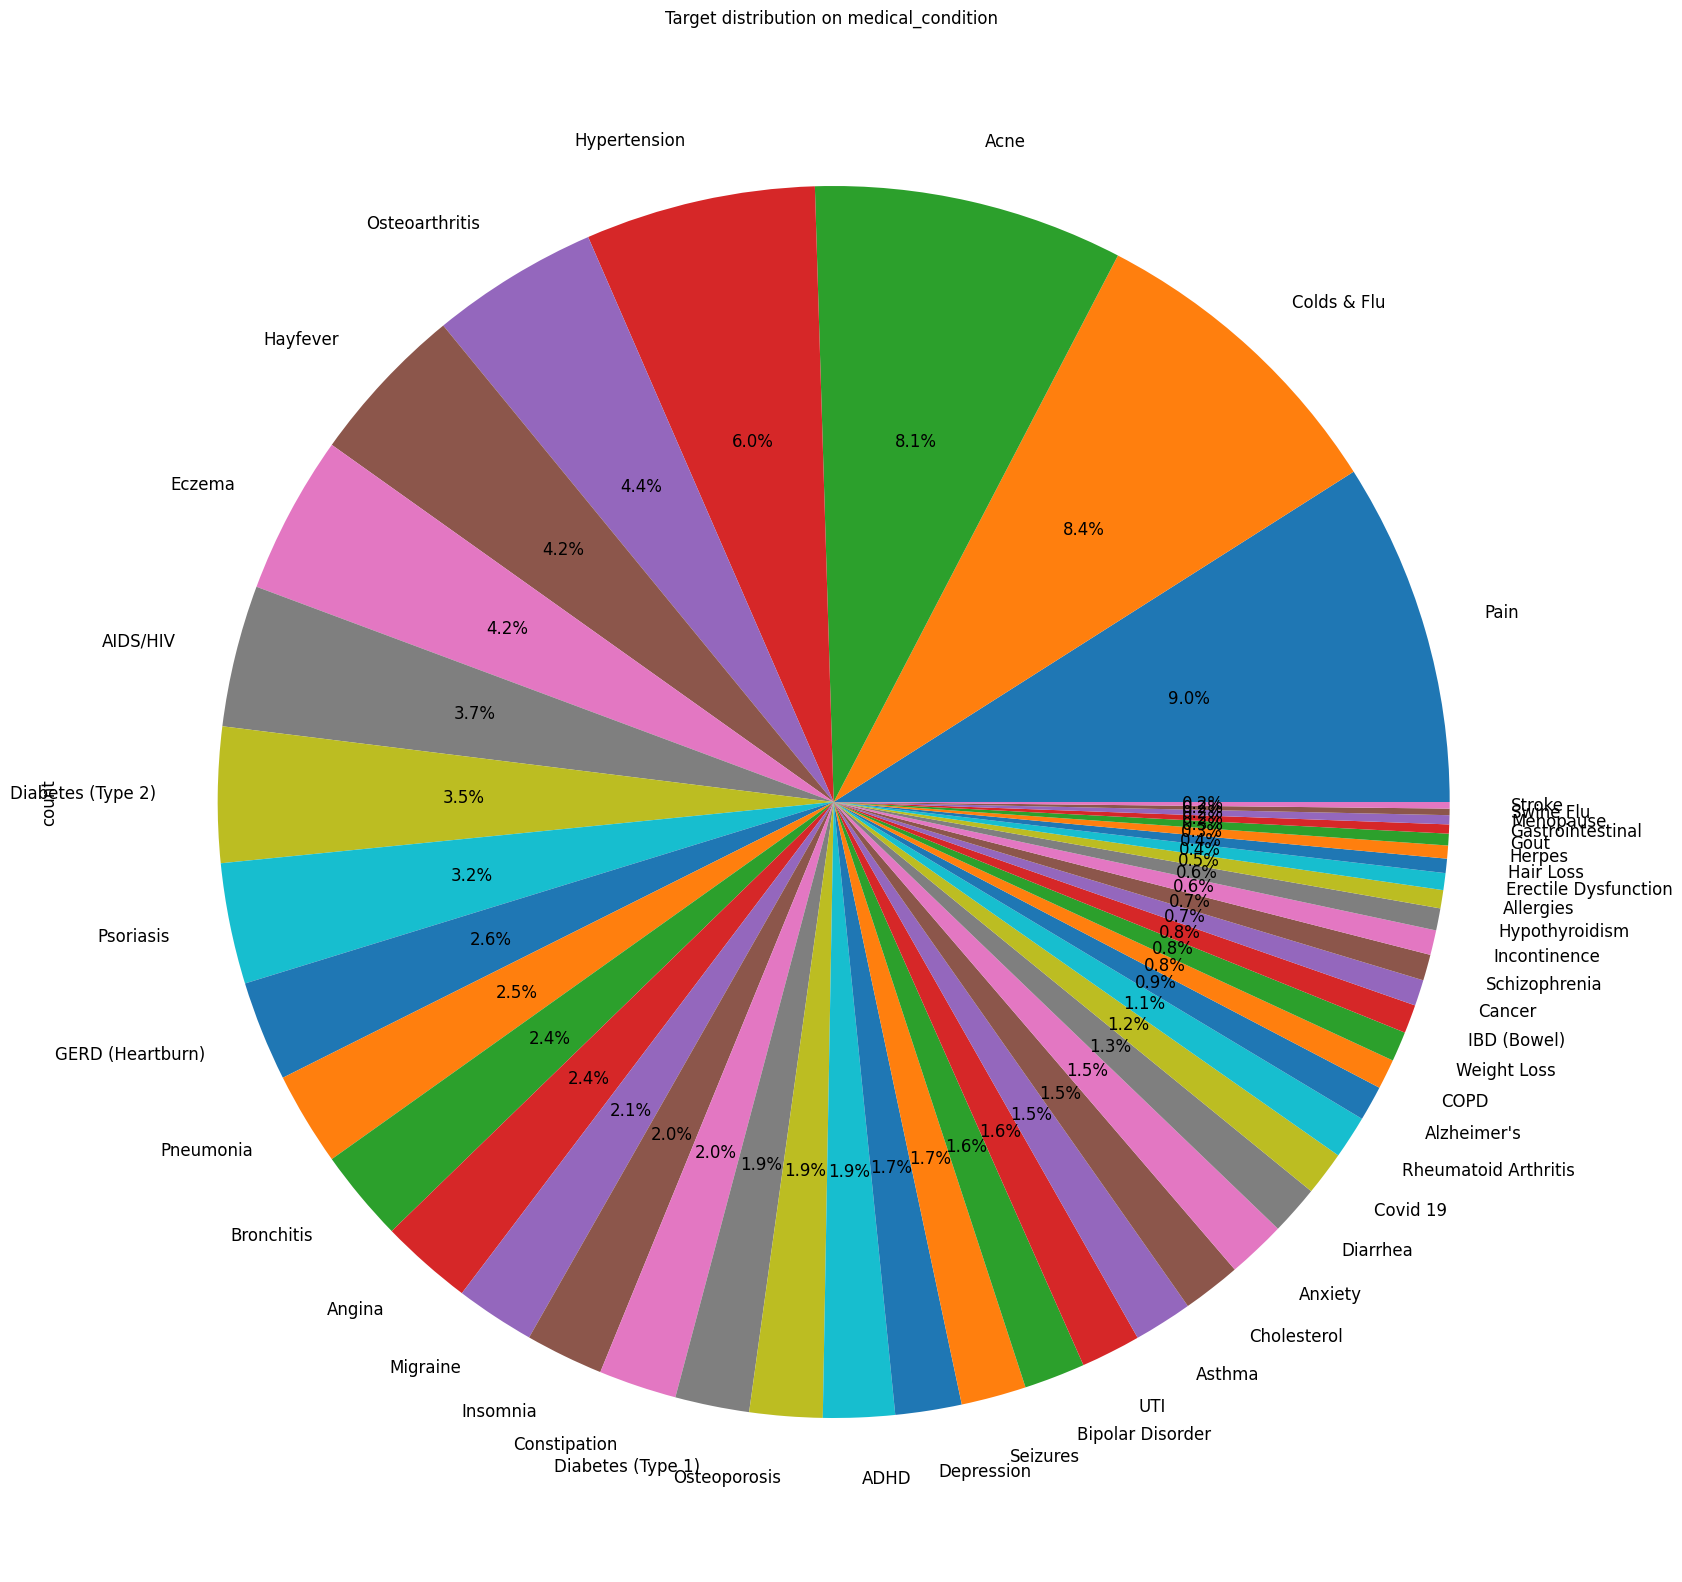

In [11]:
# Figure size
sns.set_context('poster', font_scale=0.5)
plt.figure(figsize=(20,20))
# Pie plot
df['medical_condition'].value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize':12}).set_title("Target distribution on medical_condition ")
df['medical_condition'].value_counts()


,count
rx_otc,
Rx,1998
Rx/OTC,604
OTC,328


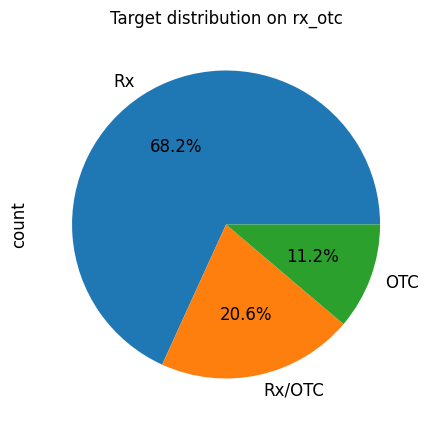

In [12]:
# Figure size
sns.set_context('poster', font_scale=0.5)
plt.figure(figsize=(5,5))
# Pie plot
df['rx_otc'].value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize':12}).set_title("Target distribution on rx_otc")

df['rx_otc'].value_counts()


/tmp/ipython-input-13-1399502476.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x = 'rx_otc',palette='plasma')


<Axes: xlabel='rx_otc', ylabel='count'>

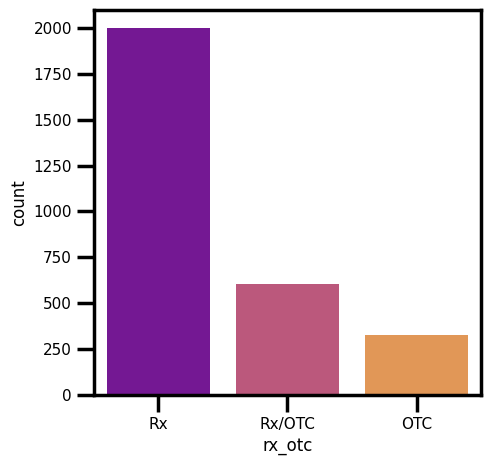

In [13]:
# Examining the variable's goal rx_otc
plt.figure(figsize=(5,5))
sns.countplot(data=df,x = 'rx_otc',palette='plasma')

,count
alcohol,
Unknown,1554
X,1377


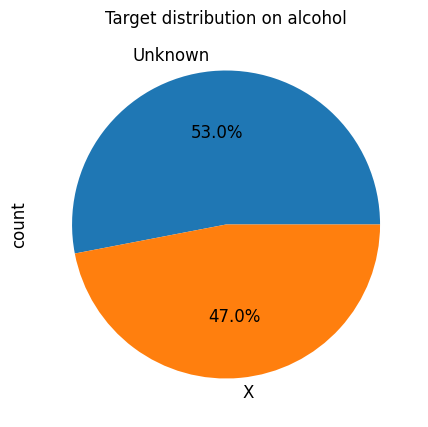

In [14]:
# Figure size
sns.set_context('poster', font_scale=0.5)
plt.figure(figsize=(5,5))
# Pie plot
df['alcohol'].value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize':12}).set_title("Target distribution on alcohol")
df['alcohol'].value_counts()


,count
rating,
10.0,153
9.0,92
8.0,62
7.0,44
1.0,44
...,...
1.7,1
1.5,1
1.1,1


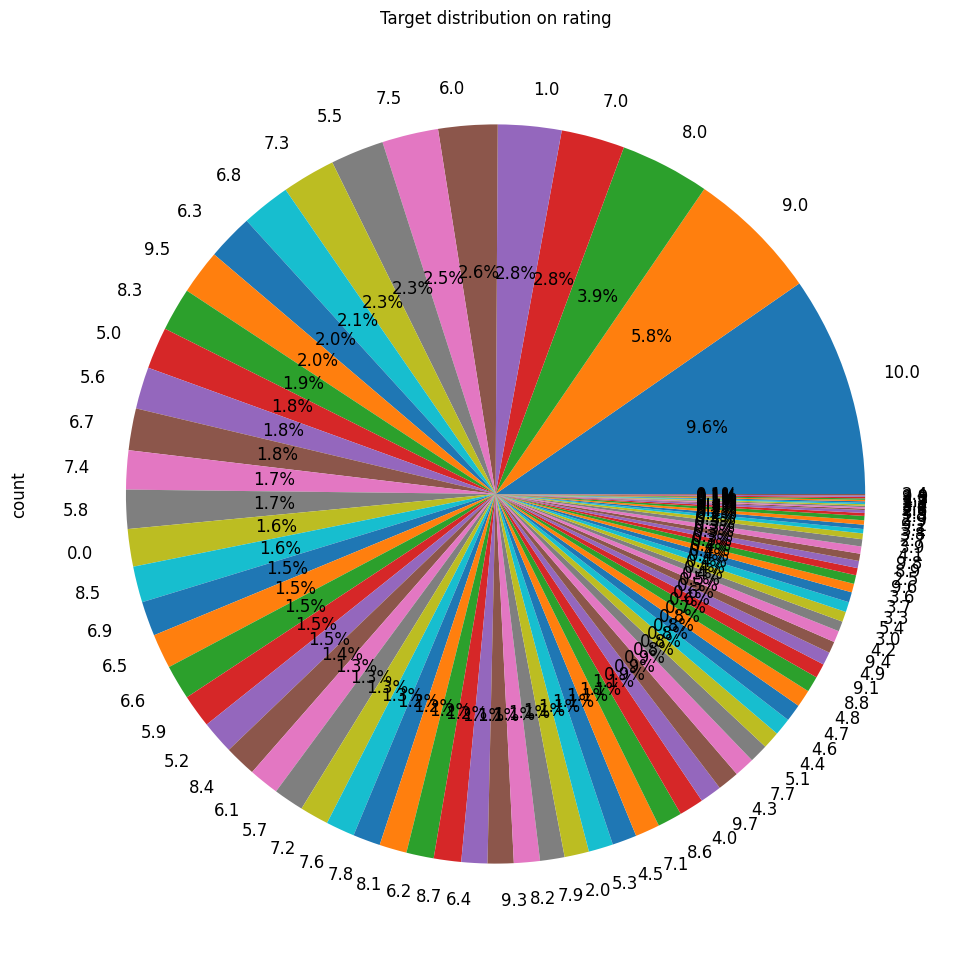

In [15]:
# Figure size
sns.set_context('poster', font_scale=0.5)
plt.figure(figsize=(12,12))
# Pie plot
df['rating'].value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize':12}).set_title("Target distribution on rating")
df['rating'].value_counts()


/tmp/ipython-input-16-2942927910.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x = 'rating',palette='plasma')


<Axes: xlabel='rating', ylabel='count'>

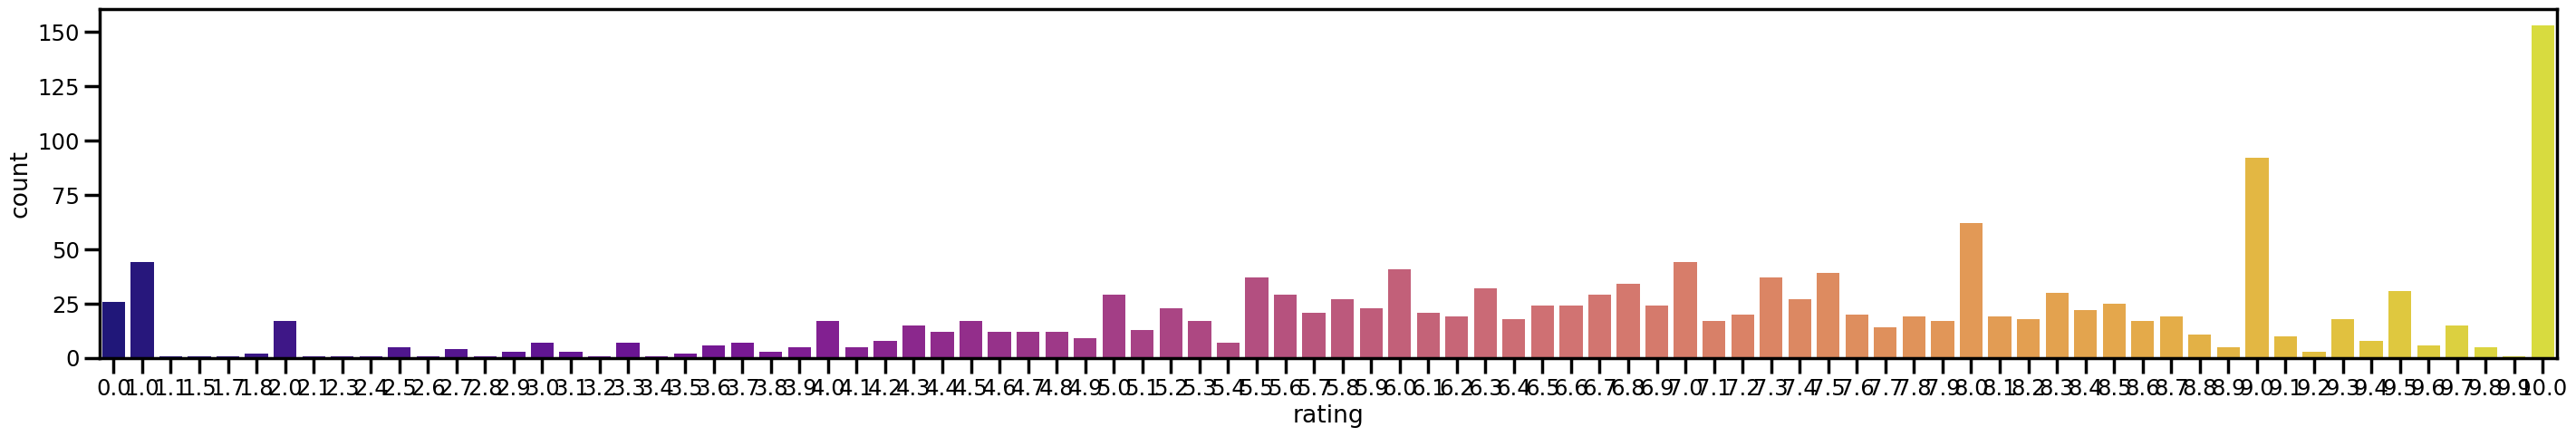

In [16]:
# Examining the variable's goal rating
sns.set_context('poster', font_scale=0.8)
plt.figure(figsize=(35,5))
sns.countplot(data=df,x = 'rating',palette='plasma')


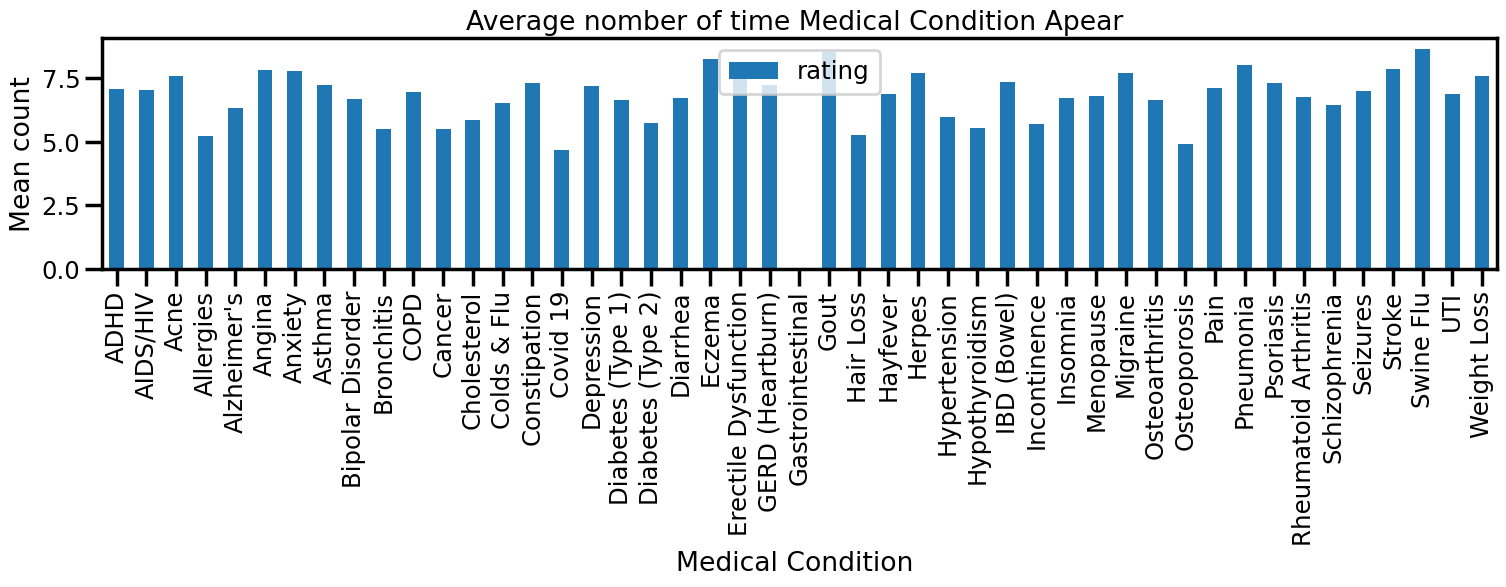

In [17]:
# data visualisation on medical_condition apears
sns.set_context('poster', font_scale=0.8)
df.groupby('medical_condition').mean(numeric_only=True).plot(kind='bar', figsize=(18,3))
plt.xlabel('Medical Condition ')
plt.ylabel('Mean count')
plt.title('Average nomber of time Medical Condition Apear ')
plt.show()

In [18]:
import plotly
import plotly.express as ex


In [19]:
ex.box(x = 'rx_otc', y = 'medical_condition',data_frame = df, template='seaborn',
       notched=True, width=800, height=500)


In [20]:
ex.box(x = 'alcohol', y = 'medical_condition',data_frame = df, template='seaborn',
       notched=True, width=800, height=400)


In [21]:
ex.box(x = 'medical_condition', y = 'drug_classes',data_frame = df, template='seaborn',
       notched=True, width=1200, height=600)


****4) Comparing drug_classes and drug activity****

In [22]:
ex.box(x = 'drug_classes', y = 'activity',data_frame = df, template='seaborn',
       notched=True, width=1200, height=1000)


****4) Comparing medical_condition and pregnancy_category****

In [23]:
ex.box(x = 'medical_condition', y = 'pregnancy_category',data_frame = df, template='seaborn',
       notched=True, width=1200, height=600)


In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.feature_extraction.text import TfidfVectorizer
import kagglehub

In [25]:
# Download dataset
path = kagglehub.dataset_download("jithinanievarghese/drugs-side-effects-and-medical-condition")
print("Path to dataset files:", path)

# Load dataset
df = pd.read_csv("/root/.cache/kagglehub/datasets/jithinanievarghese/drugs-side-effects-and-medical-condition/versions/1/drugs_side_effects_drugs_com.csv")

# Display basic info
print(df.info())
print(df.head())

Path to dataset files: /kaggle/input/drugs-side-effects-and-medical-condition
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   drug_name                      2931 non-null   object 
 1   medical_condition              2931 non-null   object 
 2   side_effects                   2807 non-null   object 
 3   generic_name                   2888 non-null   object 
 4   drug_classes                   2849 non-null   object 
 5   brand_names                    1718 non-null   object 
 6   activity                       2931 non-null   object 
 7   rx_otc                         2930 non-null   object 
 8   pregnancy_category             2702 non-null   object 
 9   csa                            2931 non-null   object 
 10  alcohol                        1377 non-null   object 
 11  related_drugs                 

In [26]:
# Drop irrelevant columns (as done previously)
df = df.drop(['no_of_reviews', 'drug_link', 'medical_condition_url', 'related_drugs'], axis=1)

# Handle missing values
df['side_effects'] = df['side_effects'].fillna('Unknown')
df['generic_name'] = df['generic_name'].fillna('Unknown')
df['drug_classes'] = df['drug_classes'].fillna('Unknown')
df['brand_names'] = df['brand_names'].fillna('Unknown')
df['pregnancy_category'] = df['pregnancy_category'].fillna('Unknown')
df['alcohol'] = df['alcohol'].fillna('Unknown')
df['medical_condition_description'] = df['medical_condition_description'].fillna('Unknown')

# Drop rows where target 'rating' is missing
df = df.dropna(subset=['rating'])

# Convert 'activity' to numerical (remove % and convert to float)
df['activity'] = df['activity'].str.replace('%', '').astype(float) / 100

# Encode categorical variables
categorical_cols = ['medical_condition', 'generic_name', 'drug_classes', 'pregnancy_category', 'csa', 'alcohol', 'rx_otc']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Process text data: 'side_effects' using TF-IDF
tfidf = TfidfVectorizer(max_features=100, stop_words='english')  # Limit to top 100 features
side_effects_tfidf = tfidf.fit_transform(df['side_effects']).toarray()
tfidf_df = pd.DataFrame(side_effects_tfidf, columns=[f'tfidf_{i}' for i in range(side_effects_tfidf.shape[1])])

# Reset index to align TF-IDF features with main dataframe
df = df.reset_index(drop=True)
tfidf_df = tfidf_df.reset_index(drop=True)

# Combine TF-IDF features with dataframe
df = pd.concat([df, tfidf_df], axis=1)

# Drop original text columns
df = df.drop(['side_effects', 'medical_condition_description', 'drug_name', 'brand_names'], axis=1)

# Define features and target
X = df.drop('rating', axis=1)
y = df['rating']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features (including TF-IDF and activity)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
# Initialize models
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train models
xgb_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Make predictions
xgb_pred = xgb_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Ensemble: Average predictions
ensemble_pred = (xgb_pred + rf_pred) / 2

Ensemble Model - RMSE: 2.01, MAE: 1.44
XGBoost - RMSE: 2.03, MAE: 1.44
Random Forest - RMSE: 2.02, MAE: 1.47


/tmp/ipython-input-28-3560092945.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




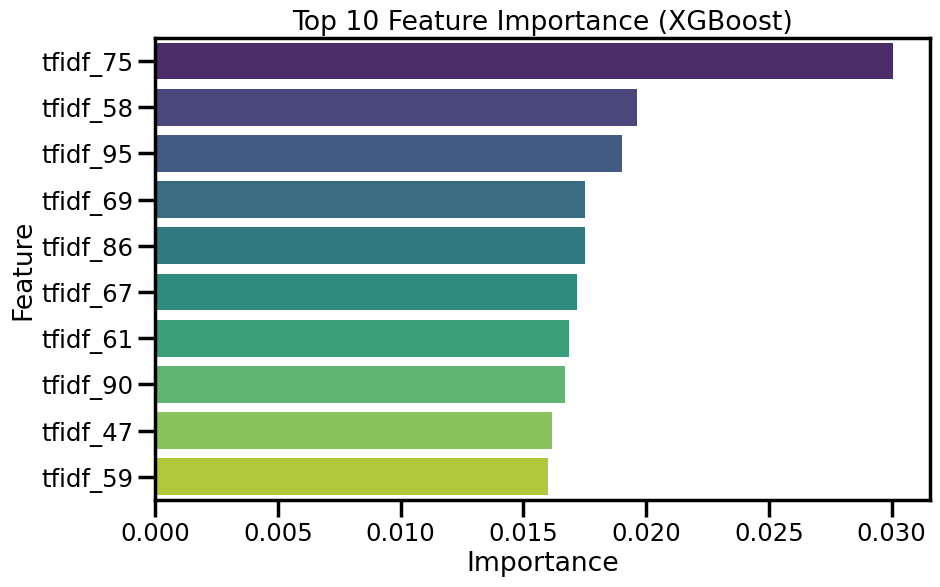

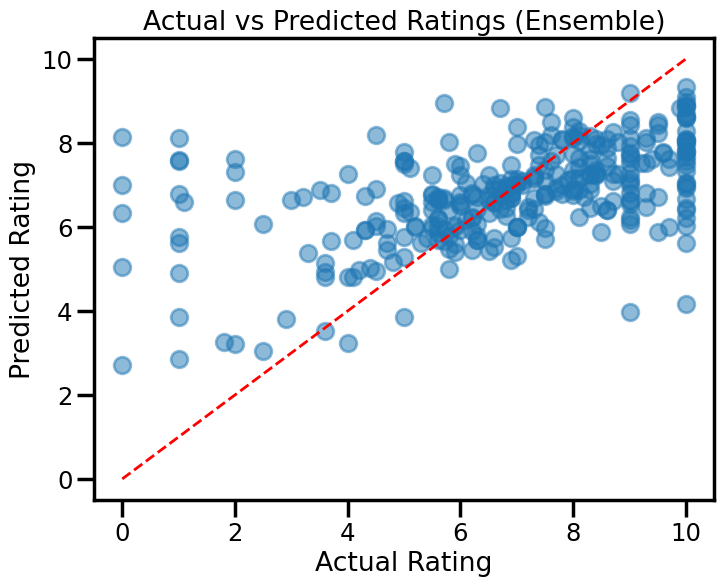

In [28]:
# Evaluate model performance
rmse = np.sqrt(mean_squared_error(y_test, ensemble_pred))
mae = mean_absolute_error(y_test, ensemble_pred)
print(f"Ensemble Model - RMSE: {rmse:.2f}, MAE: {mae:.2f}")

# Compare individual models
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
xgb_mae = mean_absolute_error(y_test, xgb_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_mae = mean_absolute_error(y_test, rf_pred)
print(f"XGBoost - RMSE: {xgb_rmse:.2f}, MAE: {xgb_mae:.2f}")
print(f"Random Forest - RMSE: {rf_rmse:.2f}, MAE: {rf_mae:.2f}")

# Feature importance (using XGBoost)
feature_importance = xgb_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Top 10 Feature Importance (XGBoost)')
plt.show()

# Visualize prediction vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, ensemble_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs Predicted Ratings (Ensemble)')
plt.show()

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
import plotly.express as px

In [30]:
# Get TF-IDF feature names
tfidf_features = tfidf.get_feature_names_out()
top_tfidf_features = {
    'tfidf_75': tfidf_features[75],
    'tfidf_58': tfidf_features[58],
    'tfidf_95': tfidf_features[95]
}
print("Top TF-IDF Features (Side Effects):")
for feature, term in top_tfidf_features.items():
    print(f"{feature}: {term}")

Top TF-IDF Features (Side Effects):
tfidf_75: sores
tfidf_58: nose
tfidf_95: vision


In [31]:
# R² Score for ensemble and individual models
ensemble_r2 = r2_score(y_test, ensemble_pred)
xgb_r2 = r2_score(y_test, xgb_pred)
rf_r2 = r2_score(y_test, rf_pred)
print(f"Ensemble R² Score: {ensemble_r2:.3f}")
print(f"XGBoost R² Score: {xgb_r2:.3f}")
print(f"Random Forest R² Score: {rf_r2:.3f}")

# Cross-validation RMSE for ensemble (approximated by averaging CV scores of individual models)
xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='neg_mean_squared_error')
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
ensemble_cv_rmse = np.sqrt(-((xgb_cv_scores + rf_cv_scores) / 2).mean())
ensemble_cv_rmse_std = np.sqrt(((xgb_cv_scores + rf_cv_scores) / 2).std())
print(f"Ensemble Cross-Validated RMSE: {ensemble_cv_rmse:.2f} ± {ensemble_cv_rmse_std:.2f}")

Ensemble R² Score: 0.276
XGBoost R² Score: 0.262
Random Forest R² Score: 0.266
Ensemble Cross-Validated RMSE: 2.41 ± 0.83


In [32]:
# R² Score for ensemble and individual models
ensemble_r2 = r2_score(y_test, ensemble_pred)
xgb_r2 = r2_score(y_test, xgb_pred)
rf_r2 = r2_score(y_test, rf_pred)
print(f"Ensemble R² Score: {ensemble_r2:.3f}")
print(f"XGBoost R² Score: {xgb_r2:.3f}")
print(f"Random Forest R² Score: {rf_r2:.3f}")

# Cross-validation RMSE for ensemble (approximated by averaging CV scores of individual models)
xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='neg_mean_squared_error')
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
ensemble_cv_rmse = np.sqrt(-((xgb_cv_scores + rf_cv_scores) / 2).mean())
ensemble_cv_rmse_std = np.sqrt(((xgb_cv_scores + rf_cv_scores) / 2).std())
print(f"Ensemble Cross-Validated RMSE: {ensemble_cv_rmse:.2f} ± {ensemble_cv_rmse_std:.2f}")

Ensemble R² Score: 0.276
XGBoost R² Score: 0.262
Random Forest R² Score: 0.266
Ensemble Cross-Validated RMSE: 2.41 ± 0.83


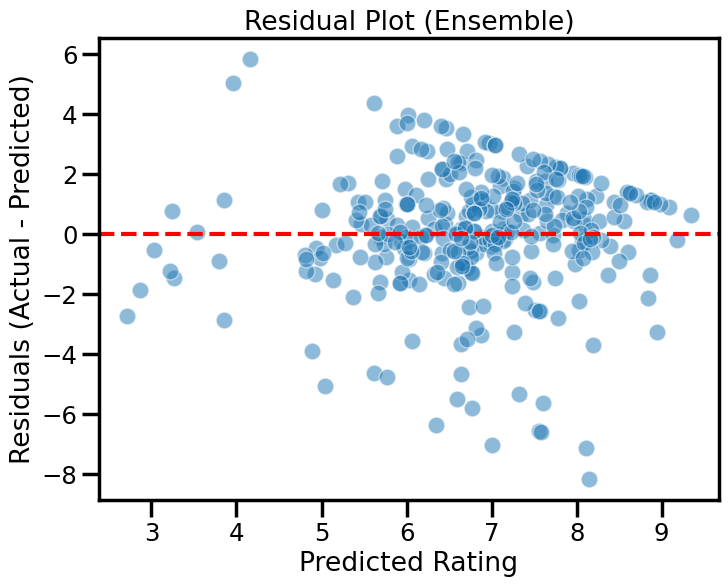

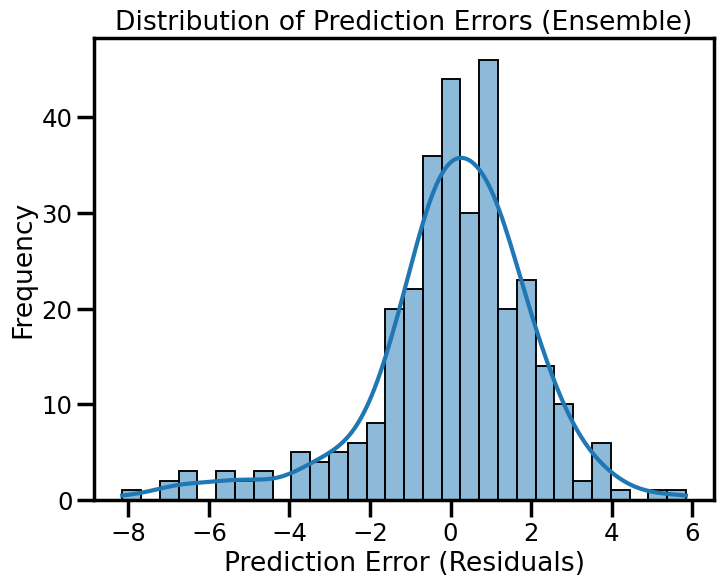

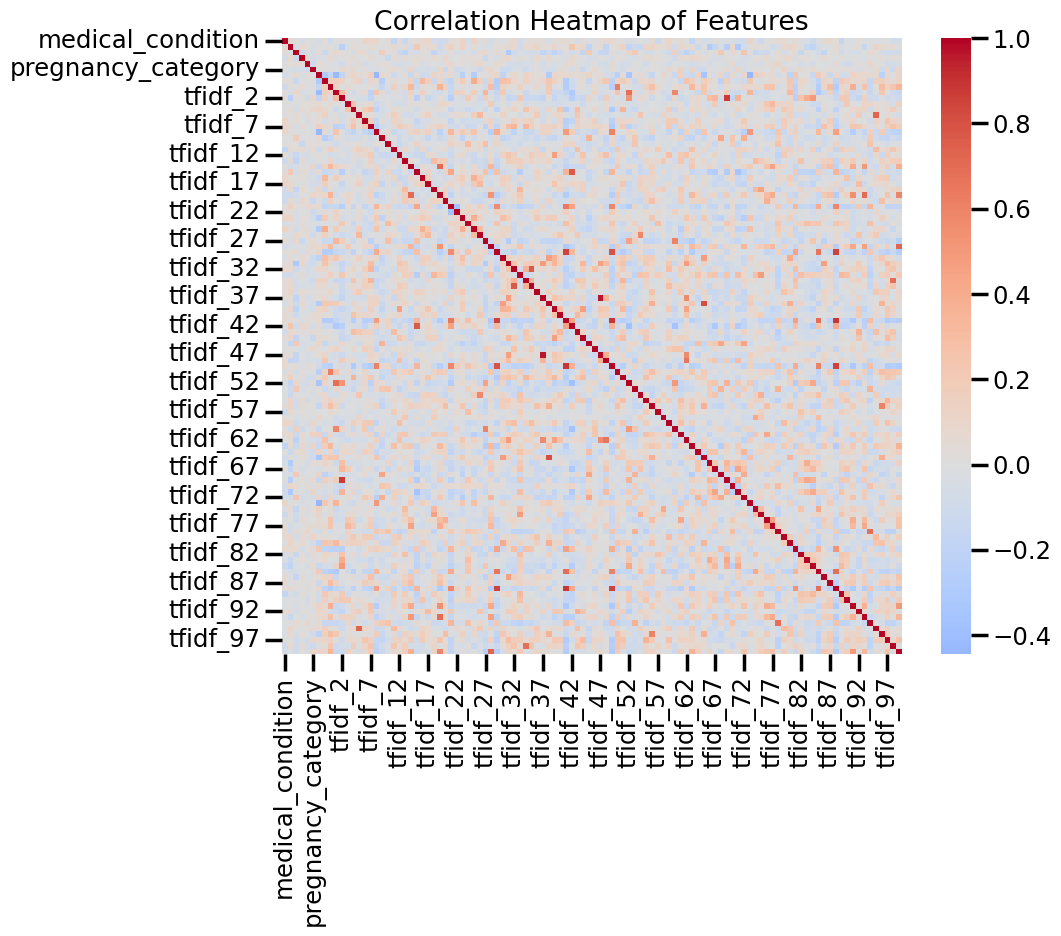

/tmp/ipython-input-33-4150113589.py:32: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




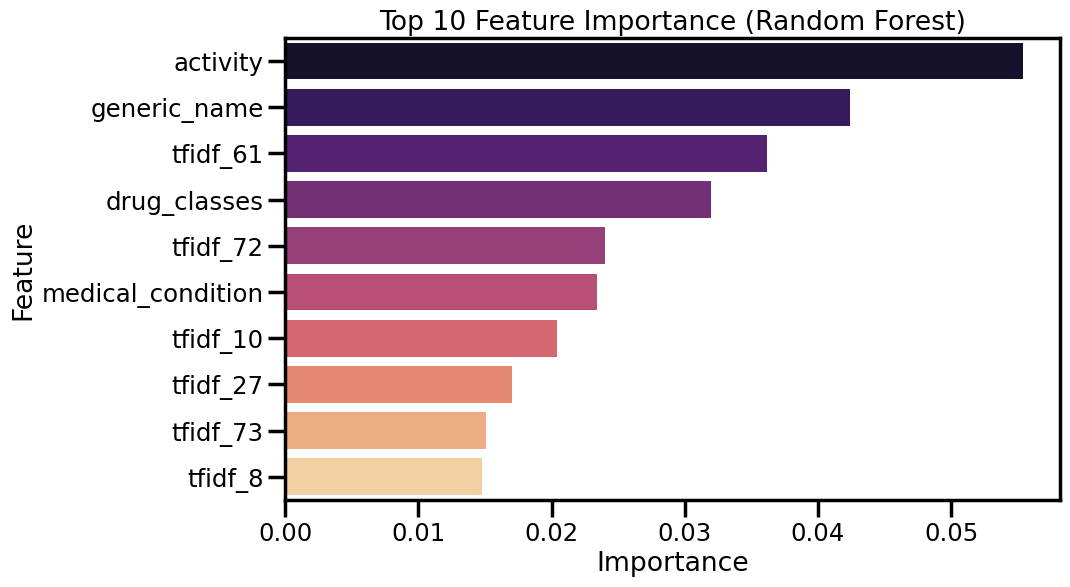

In [33]:
# 1. Residual Plot
residuals = y_test - ensemble_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=ensemble_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Rating')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot (Ensemble)')
plt.show()

# 2. Prediction Error Distribution
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Prediction Error (Residuals)')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors (Ensemble)')
plt.show()

# 3. Correlation Heatmap of Features
plt.figure(figsize=(10, 8))
correlation_matrix = pd.DataFrame(X, columns=X.columns).corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Features')
plt.show()

# 4. Feature Importance for Random Forest
rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_importance, palette='magma')
plt.title('Top 10 Feature Importance (Random Forest)')
plt.show()

# 5. Interactive Box Plot of Ratings by Medical Condition
df_plot = pd.DataFrame({'rating': y, 'medical_condition': df['medical_condition']})
fig = px.box(df_plot, x='medical_condition', y='rating', title='Rating Distribution by Medical Condition',
             template='seaborn')
fig.update_layout(width=800, height=500)
fig.show()

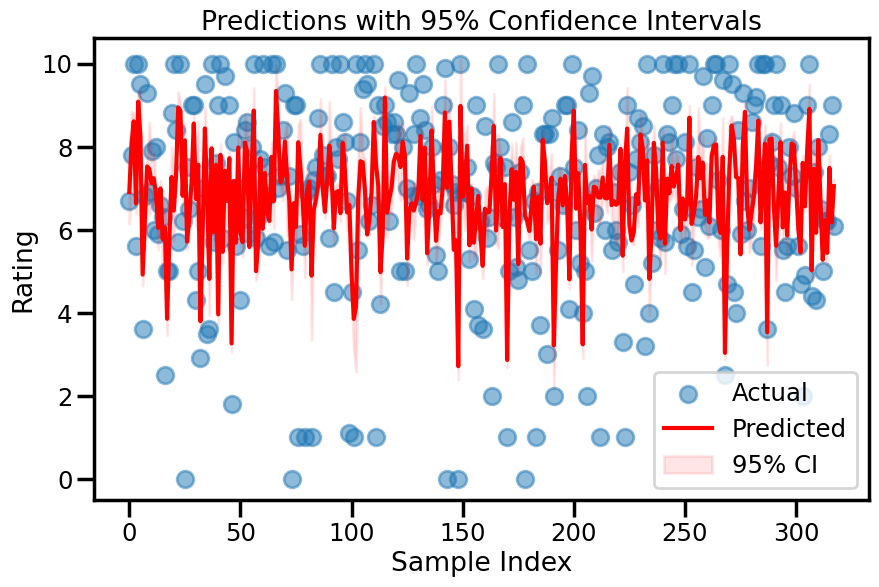

In [34]:
# Approximate prediction intervals (using standard deviation of individual model predictions)
pred_std = np.std([xgb_pred, rf_pred], axis=0)
lower_bound = ensemble_pred - 1.96 * pred_std  # 95% confidence interval
upper_bound = ensemble_pred + 1.96 * pred_std

# Plot predictions with intervals
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual', alpha=0.5)
plt.plot(range(len(y_test)), ensemble_pred, label='Predicted', color='red')
plt.fill_between(range(len(y_test)), lower_bound, upper_bound, color='red', alpha=0.1, label='95% CI')
plt.xlabel('Sample Index')
plt.ylabel('Rating')
plt.title('Predictions with 95% Confidence Intervals')
plt.legend()
plt.show()


In [35]:
# Update results DataFrame
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': ensemble_pred,
    'XGBoost': xgb_pred,
    'Random Forest': rf_pred,
    'Residual': residuals,
    'Lower_Bound': lower_bound,
    'Upper_Bound': upper_bound
})
results_df.to_csv('drug_rating_predictions_enhanced.csv', index=False)
print("Enhanced predictions saved to 'drug_rating_predictions_enhanced.csv'")

# Summary
print("\nEnhanced Summary:")
print(f"- Ensemble R² Score: {ensemble_r2:.3f}")
print(f"- Ensemble Cross-Validated RMSE: {ensemble_cv_rmse:.2f} ± {ensemble_cv_rmse_std:.2f}")
print(f"- Top TF-IDF Features: {top_tfidf_features}")
print(f"- Observations: The model performs moderately well, but residuals suggest potential outliers or non-linear patterns.")

Enhanced predictions saved to 'drug_rating_predictions_enhanced.csv'

Enhanced Summary:
- Ensemble R² Score: 0.276
- Ensemble Cross-Validated RMSE: 2.41 ± 0.83
- Top TF-IDF Features: {'tfidf_75': 'sores', 'tfidf_58': 'nose', 'tfidf_95': 'vision'}
- Observations: The model performs moderately well, but residuals suggest potential outliers or non-linear patterns.
